In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_fly = pd.read_csv('flights.csv')
df_fly.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


# Clean Null Values

In [2]:
df_fly.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [3]:
df_fly[df_fly.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [4]:
df_fly[df_fly.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [5]:
df_fly.DepDel15=df_fly.DepDel15.fillna(0)
df_fly.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

# Clean Outliers

DepDelay 
Minimum value : -63.00
Maximum value : 1425.00
Mean value : 10.35
Median value : -1.00
Mode value : -3.00

ArrDelay 
Minimum value : -75.00
Maximum value : 1440.00
Mean value : 6.50
Median value : -3.00
Mode value : 0.00



C:\Users\sansk\AppData\Local\Temp\ipykernel_15416\3221765198.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sansk\AppData\Local\Temp\ipykernel_15416\3221765198.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


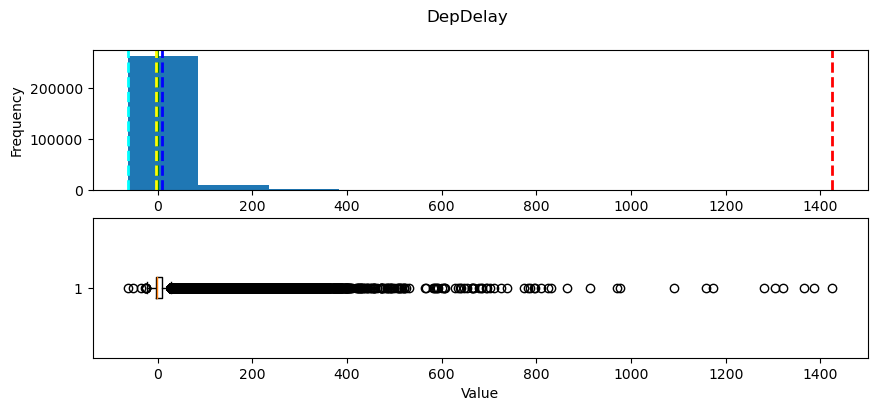

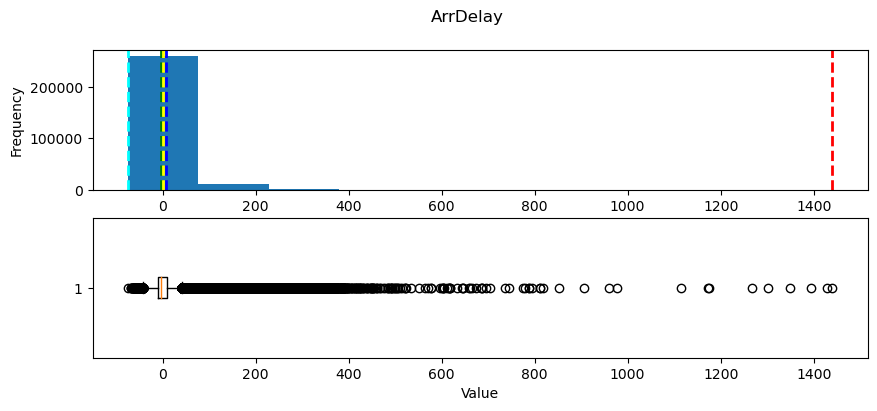

In [6]:
def show_distribution(var):
    
        # Get statistics
    min_val=var.min()
    max_val=var.max()
    mean_val=var.mean()
    median_val=var.median()
    mode_val=var.mode()[0]
    
    print(var.name,'\nMinimum value : {:.2f}\nMaximum value : {:.2f}\nMean value : {:.2f}\nMedian value : {:.2f}\nMode value : {:.2f}\n'.format(min_val,max_val,mean_val,median_val,mode_val))
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig,a=plt.subplots(2,1,figsize=(10,4))
    
    #plot Histogram
    a[0].hist(var)
    a[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    a[0].axvline(x=min_val,color='cyan',linestyle='dashed',linewidth=2)
    a[0].axvline(x=max_val,color='red',linestyle='dashed',linewidth=2)
    a[0].axvline(x=mean_val,color='blue',linestyle='dashed',linewidth=2)
    a[0].axvline(x=median_val,color='green',linestyle='dashed',linewidth=2)
    a[0].axvline(x=mode_val,color='yellow',linestyle='dashed',linewidth=2)
    
    #plot a boxplot
    a[1].boxplot(var,vert=False)
    a[1].set_xlabel("Value")
    
    # Add a title to the Figure
    fig.suptitle(var.name)

    # Show the figure
    fig.show()
    
    
## Call the function for each delay field
delayfields=['DepDelay','ArrDelay']
for i in delayfields:
    show_distribution(df_fly[i])

DepDelay 
Minimum value : -11.00
Maximum value : 16.00
Mean value : -0.92
Median value : -2.00
Mode value : -3.00

ArrDelay 
Minimum value : -32.00
Maximum value : 37.00
Mean value : -5.03
Median value : -6.00
Mode value : 0.00



C:\Users\sansk\AppData\Local\Temp\ipykernel_15416\3221765198.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sansk\AppData\Local\Temp\ipykernel_15416\3221765198.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


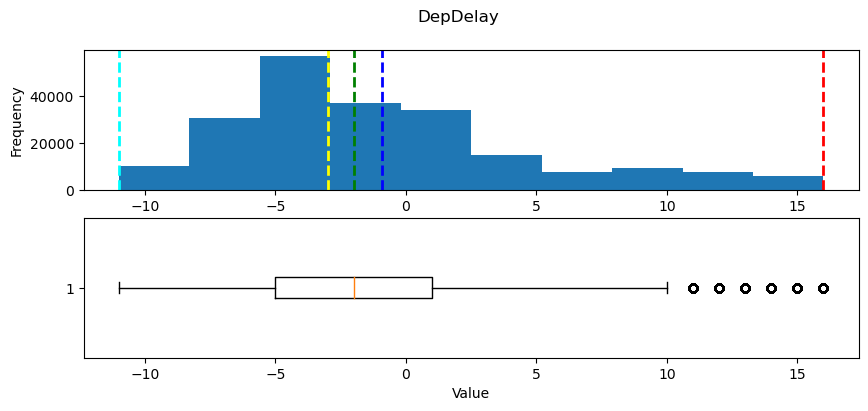

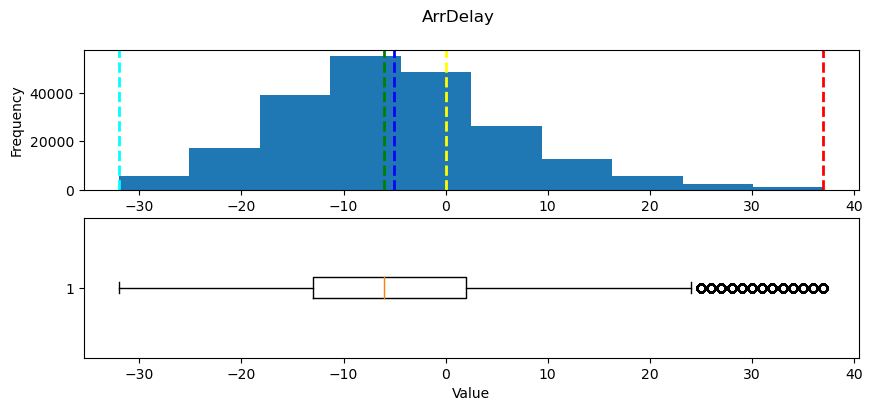

In [7]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_1per=df_fly.ArrDelay.quantile(0.01)
ArrDelay_90per=df_fly.ArrDelay.quantile(0.90)
df_fly=df_fly[df_fly.ArrDelay>ArrDelay_1per]
df_fly=df_fly[df_fly.ArrDelay<ArrDelay_90per]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_1per=df_fly.DepDelay.quantile(0.01)
DepDelay_90per=df_fly.DepDelay.quantile(0.90)
df_fly=df_fly[df_fly.DepDelay>DepDelay_1per]
df_fly=df_fly[df_fly.DepDelay<DepDelay_90per]

for i in delayfields:
    show_distribution(df_fly[i])

# Explore Data

In [8]:
df_fly.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


### What are the average (mean) departure and arrival delays?

In [9]:
df_fly[delayfields].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

## How do the carriers compare in terms of arrival delay performance?

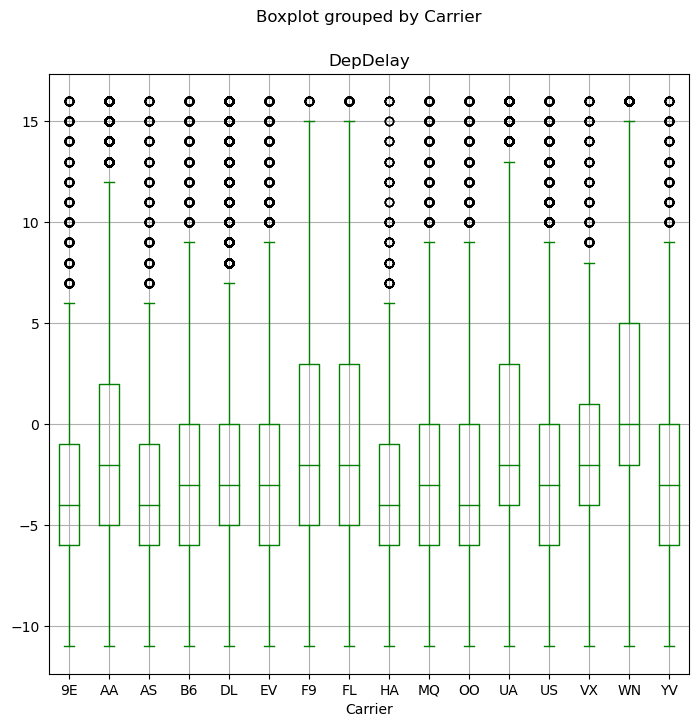

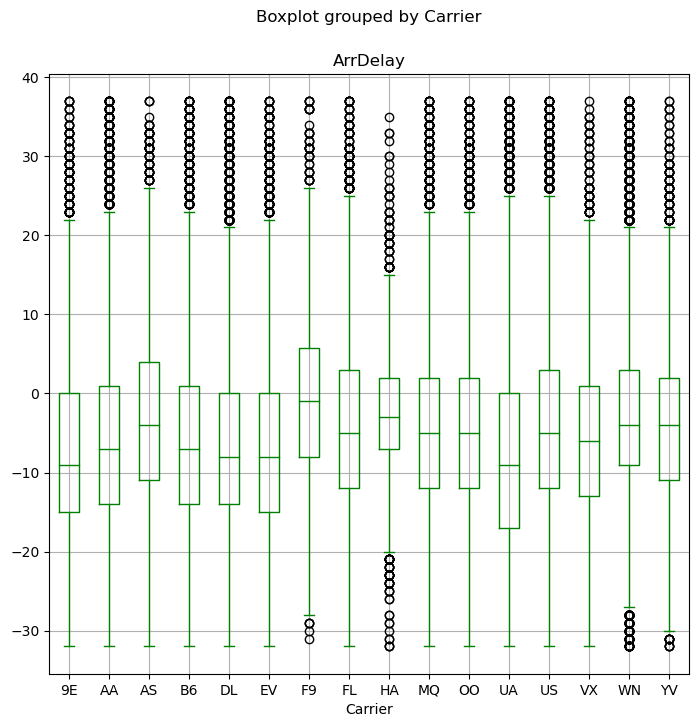

In [10]:
for i in delayfields:
    df_fly.boxplot(column=i, by='Carrier', figsize=(8,8),color='green')

## Is there a noticable difference in arrival delays for different days of the week?

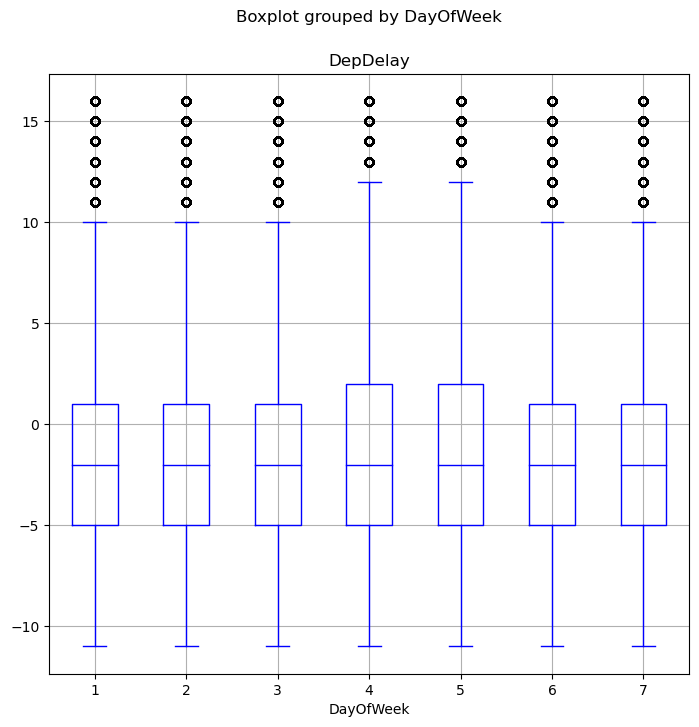

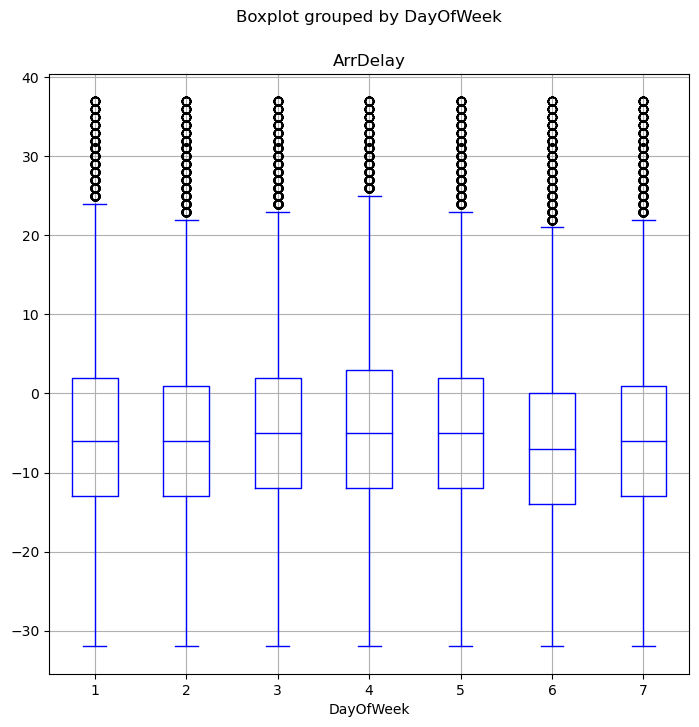

In [11]:
for i in delayfields:
    df_fly.boxplot(column=i, by='DayOfWeek', figsize=(8,8),color='blue')

## Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


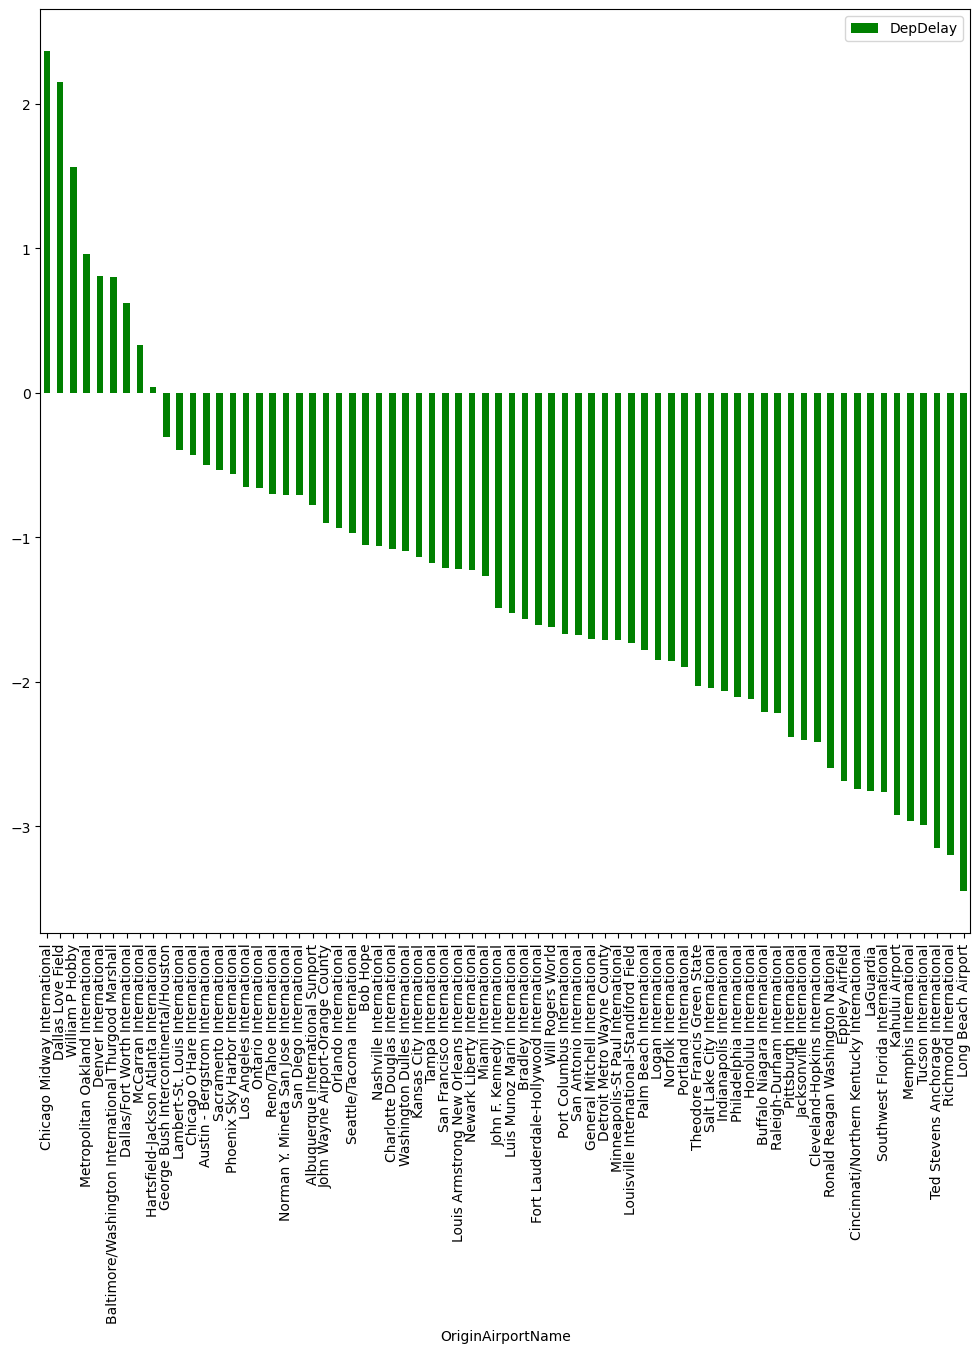

In [12]:
departure_group=df_fly.groupby(df_fly.OriginAirportName)

mean_departuredelays=pd.DataFrame(departure_group['DepDelay'].mean()).sort_values('DepDelay',ascending=False)
mean_departuredelays.plot(kind='bar',figsize=(12,12),color='green')
mean_departuredelays

## Do *late* departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

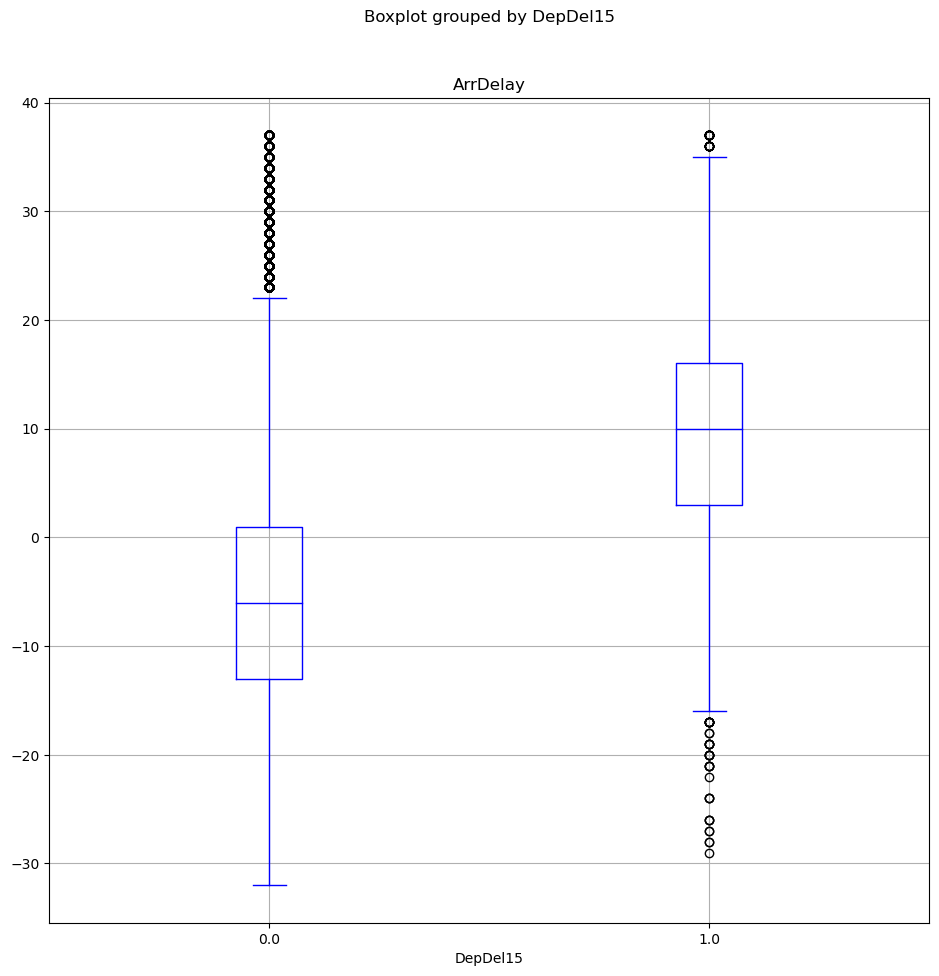

In [13]:
df_fly.boxplot(column='ArrDelay',by='DepDel15',figsize=(11,11),color='blue')